In [120]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

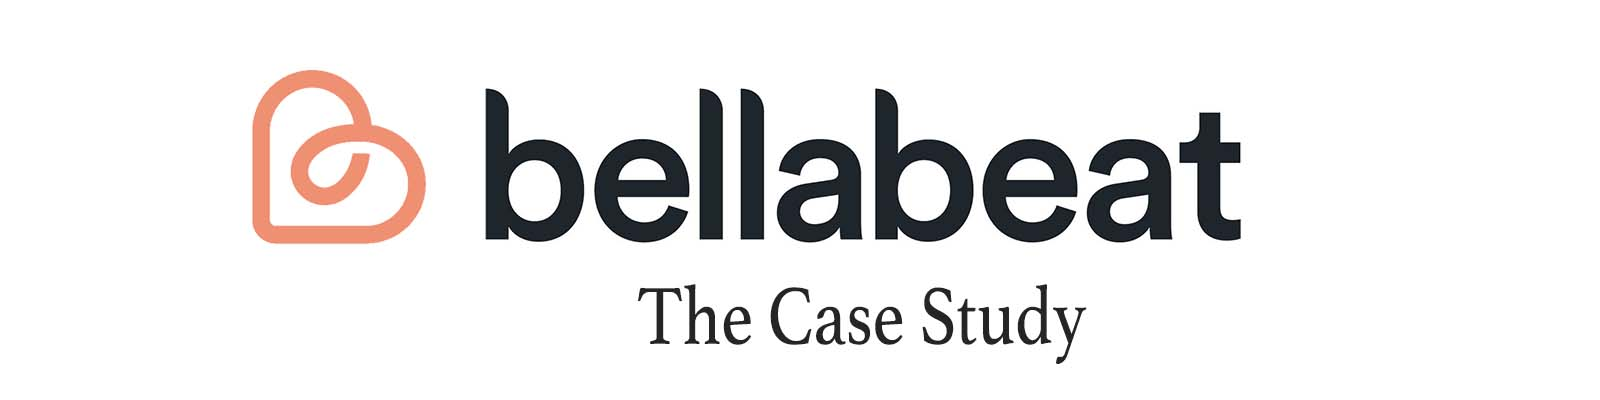

# <span style="color:teal;">Summary:
                              

Bellabeat is a wellness company that manufactures high tech, health-focused smart products. Founded by Urška Sršen and Sando Mur, Bellabeat uses beautifully designed technology to inspire women around the world to keep track of their health and wellness. Their products track this information by collecting data on daily activity, sleep habits, stress levels, and reproductive health.

Despite competition from the top smart-wearable manufactures, Bellabeat has carved a lane for itself, garnering a measurable amount of success and a strong bond with its consumers.

 <span style="color:teal;"> Business Task:
 -----------------------------------------

The focus of this case study is to gain insight into growth opportunities to help guide the marketing strategy for the company, Bellabeat, by analyzing the consumer usage of other smart devices on the market.


<span style="color:teal;">Stakeholders:
---------------------------------------
    
* Urška Sršen: Bellabeat’s cofounder and Chief Creative Office
* Sando Mur: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team
* Bellabeat marketing analytics team: A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Bellabeat’s marketing strategy.<span style="color:teal;">Primary Questions:
--------------------------------------------

* What are some trends in smart device usage? 
* How could these trends apply to Bellabeat customers? 
* How could these trends help influence Bellabeat marketing strategy? 


<span style="color:teal;">Stakeholders:
---------------------------------------
    
* Urška Sršen: Bellabeat’s cofounder and Chief Creative Office
* Sando Mur: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team
* Bellabeat marketing analytics team: A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Bellabeat’s marketing strategy.

<span style="color:teal;">The Data: Preparing, and Processing for Analysis
--------------------------------------------------------------------------

The data source used for the case study is the [Fitbit Fitness Tracker](https://www.kaggle.com/arashnic/fitbit) Data, a dataset stored and made available by Mobius. 
The data contains data from thirty fitbit users who consented to the submission of personal tracker 
data for physical activity, daily steps, heart rate, and sleep monitoring.

<span style="color:teal;"> Process Phase:
-----------------------------------------

Due to the amount of data provided, the data will process my data in Python and create visualizations in Tableau to share findings with the Stakeholders.

The datasets that will be used to help solve the business task will be:
* daily_steps
* daily_activity
* daily_calories
* daily_sleep
* weigth_log     
* daily_intensities


In [121]:
daily_activity =pd.read_csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')
daily_steps =pd.read_csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv')
daily_calories =pd.read_csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv')
daily_sleep =pd.read_csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv')
daily_intensities =pd.read_csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv')
weight_log =pd.read_csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv')


In [122]:
daily_activity.head(5)

In [123]:
daily_steps.head(5)

In [124]:
daily_calories.head(5)

In [125]:
daily_sleep.head(5)

In [126]:
daily_sleep.head(5)

In [127]:
daily_activity.head(5)

In [128]:
daily_intensities.head(5)

In [129]:
daily_activity.info()
daily_steps.info()
daily_calories.info()
daily_sleep.info()
daily_intensities.info()
weight_log.info()

In [130]:
print(daily_activity['Id'].nunique())
print(daily_steps['Id'].nunique())
print(daily_calories['Id'].nunique())
print(daily_intensities['Id'].nunique())
print(daily_sleep['Id'].nunique())
print(weight_log['Id'].nunique())

In [131]:
daily_sleep.rename(columns={'SleepDay': 'Date&Time', 'TotalSleepRecords':'Total_Sleep_Records','TotalMinutesAsleep':'Total_Min_Sleep','TotalTimeInBed':'Total_Sleep_Time'}, inplace=True)
daily_sleep

In [132]:
daily_steps.rename(columns={'ActivityDay':'Activity_Date','StepTotal':'Total_Steps'}, inplace=True)
daily_steps

In [133]:
daily_calories.rename(columns={'ActivityDay':'Activity_Date', 'Calories':'Total_Calories'},inplace=True)

In [134]:
weight_log.rename(columns={'WeightKg':'Weight_Kg', 'WeightPounds':'Weight_Lb','Fat':'Total_Fat','IsManualReport':'Is_Manual_Rpt','LogId':'Log_Id'},inplace=True)

In [135]:
daily_activity.rename(columns={'ActivityDate':'Activity_Date', 'TotalSteps':'Total_Steps', 'TotalDistance':'Total_Distance', 'TrackerDistance':'Tracker_Distance','LoggedActivitiesDistance':'Logged_Activ_Dist', 'VeryActiveDistance':'Very_Activ_Dist','ModeratelyActiveDistance':'Mod_Activ_Dist','LightActiveDistance':'Light_Activ_Dist','SedentaryActiveDistance':'Sedent_Activ_Dist', 'VeryActiveMinutes':'Very_Activ_Min','FairlyActiveMinutes':'Fairly_Activ_Min','LightlyActiveMinutes':'Lightly_Activ_Min','SedentaryMinutes':'Seden_Min','Calories':'Total_Calories'},inplace=True)

In [136]:
daily_intensities.rename(columns={'ActivityDate':'Activity_Date', 'SedentaryMinutes':'Sedentary_Min','LightlyActiveMinutes':'Lightly_Active_Min','FairlyActiveMinutes':'Fairly_Active_Min','VeryActiveMinutes':'Very_Active_Min','SedentaryActiveDistance':'Sedentary_Active_Dist','LightActiveDistance':'Light_Active_Dist','ModeratelyActiveDistance':'Moderately_Active_Dist','VeryActiveDistance':'Very_Active_Dist'},inplace=True)

In [137]:
new_daily_activity= pd.concat([daily_steps, daily_activity['Total_Distance'], daily_intensities['Sedentary_Min'], daily_intensities['Very_Active_Min'],daily_intensities['Sedentary_Active_Dist'], daily_intensities['Very_Active_Dist'], daily_sleep['Total_Sleep_Time'], daily_calories['Total_Calories']], axis='columns', sort=False)
new_daily_activity = new_daily_activity.drop_duplicates()
new_daily_activity

In [138]:
Id_grp = new_daily_activity.groupby(['Id'])
Id_grp.mean()

In [139]:
df=new_daily_activity
df['Activity_Date'] = pd.to_datetime(df['Activity_Date']) 
df['Day of Week Text'] = df['Activity_Date'].dt.day_name()
df.rename(columns={'Day of Week Text':'Day'},inplace=True)
df

In [140]:
day_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Day'] = pd.Categorical(df['Day'], categories=day_list, ordered=True)
df = df.sort_values('Day')

In [141]:
week_day = df.groupby(['Day'])
daily_averages=week_day.mean()

In [142]:
daily_averages = daily_averages.drop(columns=['Id'])
daily_averages

In [144]:
daily_averages.columns=[x.lower() for x in daily_averages.columns]
daily_averages